In [20]:
#ultima domanda??

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import random
import pandas as pd
import corner
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from astroML.utils import completeness_contamination
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from astroML.classification import GMMBayes
from sklearn.neighbors import KNeighborsClassifier

plt.rc('text', usetex=True)  # Abilita l'uso di LaTeX in tutte le stringhe di testo
plt.rc('font', family='serif')

%matplotlib inline
%config InlineBackend.figure_format='retina'

#### Tasks

- Create arrays for the $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create an array with the class labels where galaxy=$0$ and quasar=$1$. 
- Classify the dataset against the target label.
- Try some of the classification methods we've seen so far and evaluate the performance using the ROC curve.
- Remember to split the dataset into training and validation...

#### Ideas
- Try using different colors (a subset of them first, than all together). Which is the most important feature?
- What are the colors that better satisfy or invalidate the "Naive" assumption of independence between the attributes?


In [2]:
df = pd.read_csv('../solutions/galaxyquasar.csv')

In [3]:
df

,u,g,r,i,z,class,z1,zerr
0,18.97213,18.53676,18.58280,18.34936,18.29215,QSO,0.522819,0.000155
1,19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.122846,0.000028
2,19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.000000,0.000000
3,19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.147435,0.000009
4,19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.000631
...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,GALAXY,0.113016,0.000011
49996,18.52021,16.88262,16.03280,15.56884,15.22454,GALAXY,0.085063,0.000014
49997,18.62718,17.30876,16.87371,16.62399,16.42296,GALAXY,0.054429,0.000008
49998,19.55140,18.27711,17.62101,17.21947,17.03347,GALAXY,0.112571,0.000009


In [4]:
ug = np.array(df['u']-df['g'])
gr = np.array(df['g']-df['r'])
ri = np.array(df['r']-df['i'])
iz = np.array(df['i']-df['z'])

labels = np.where(df['class'] == 'QSO', 1, 0)

In [5]:
X = np.column_stack((ug, gr, ri, iz))
X_train, X_test, lab_train, lab_test = train_test_split(X, labels, test_size=0.3, random_state=7)

Too few points to create valid contours
Too few points to create valid contours
Too few points to create valid contours
Too few points to create valid contours
Too few points to create valid contours
Too few points to create valid contours


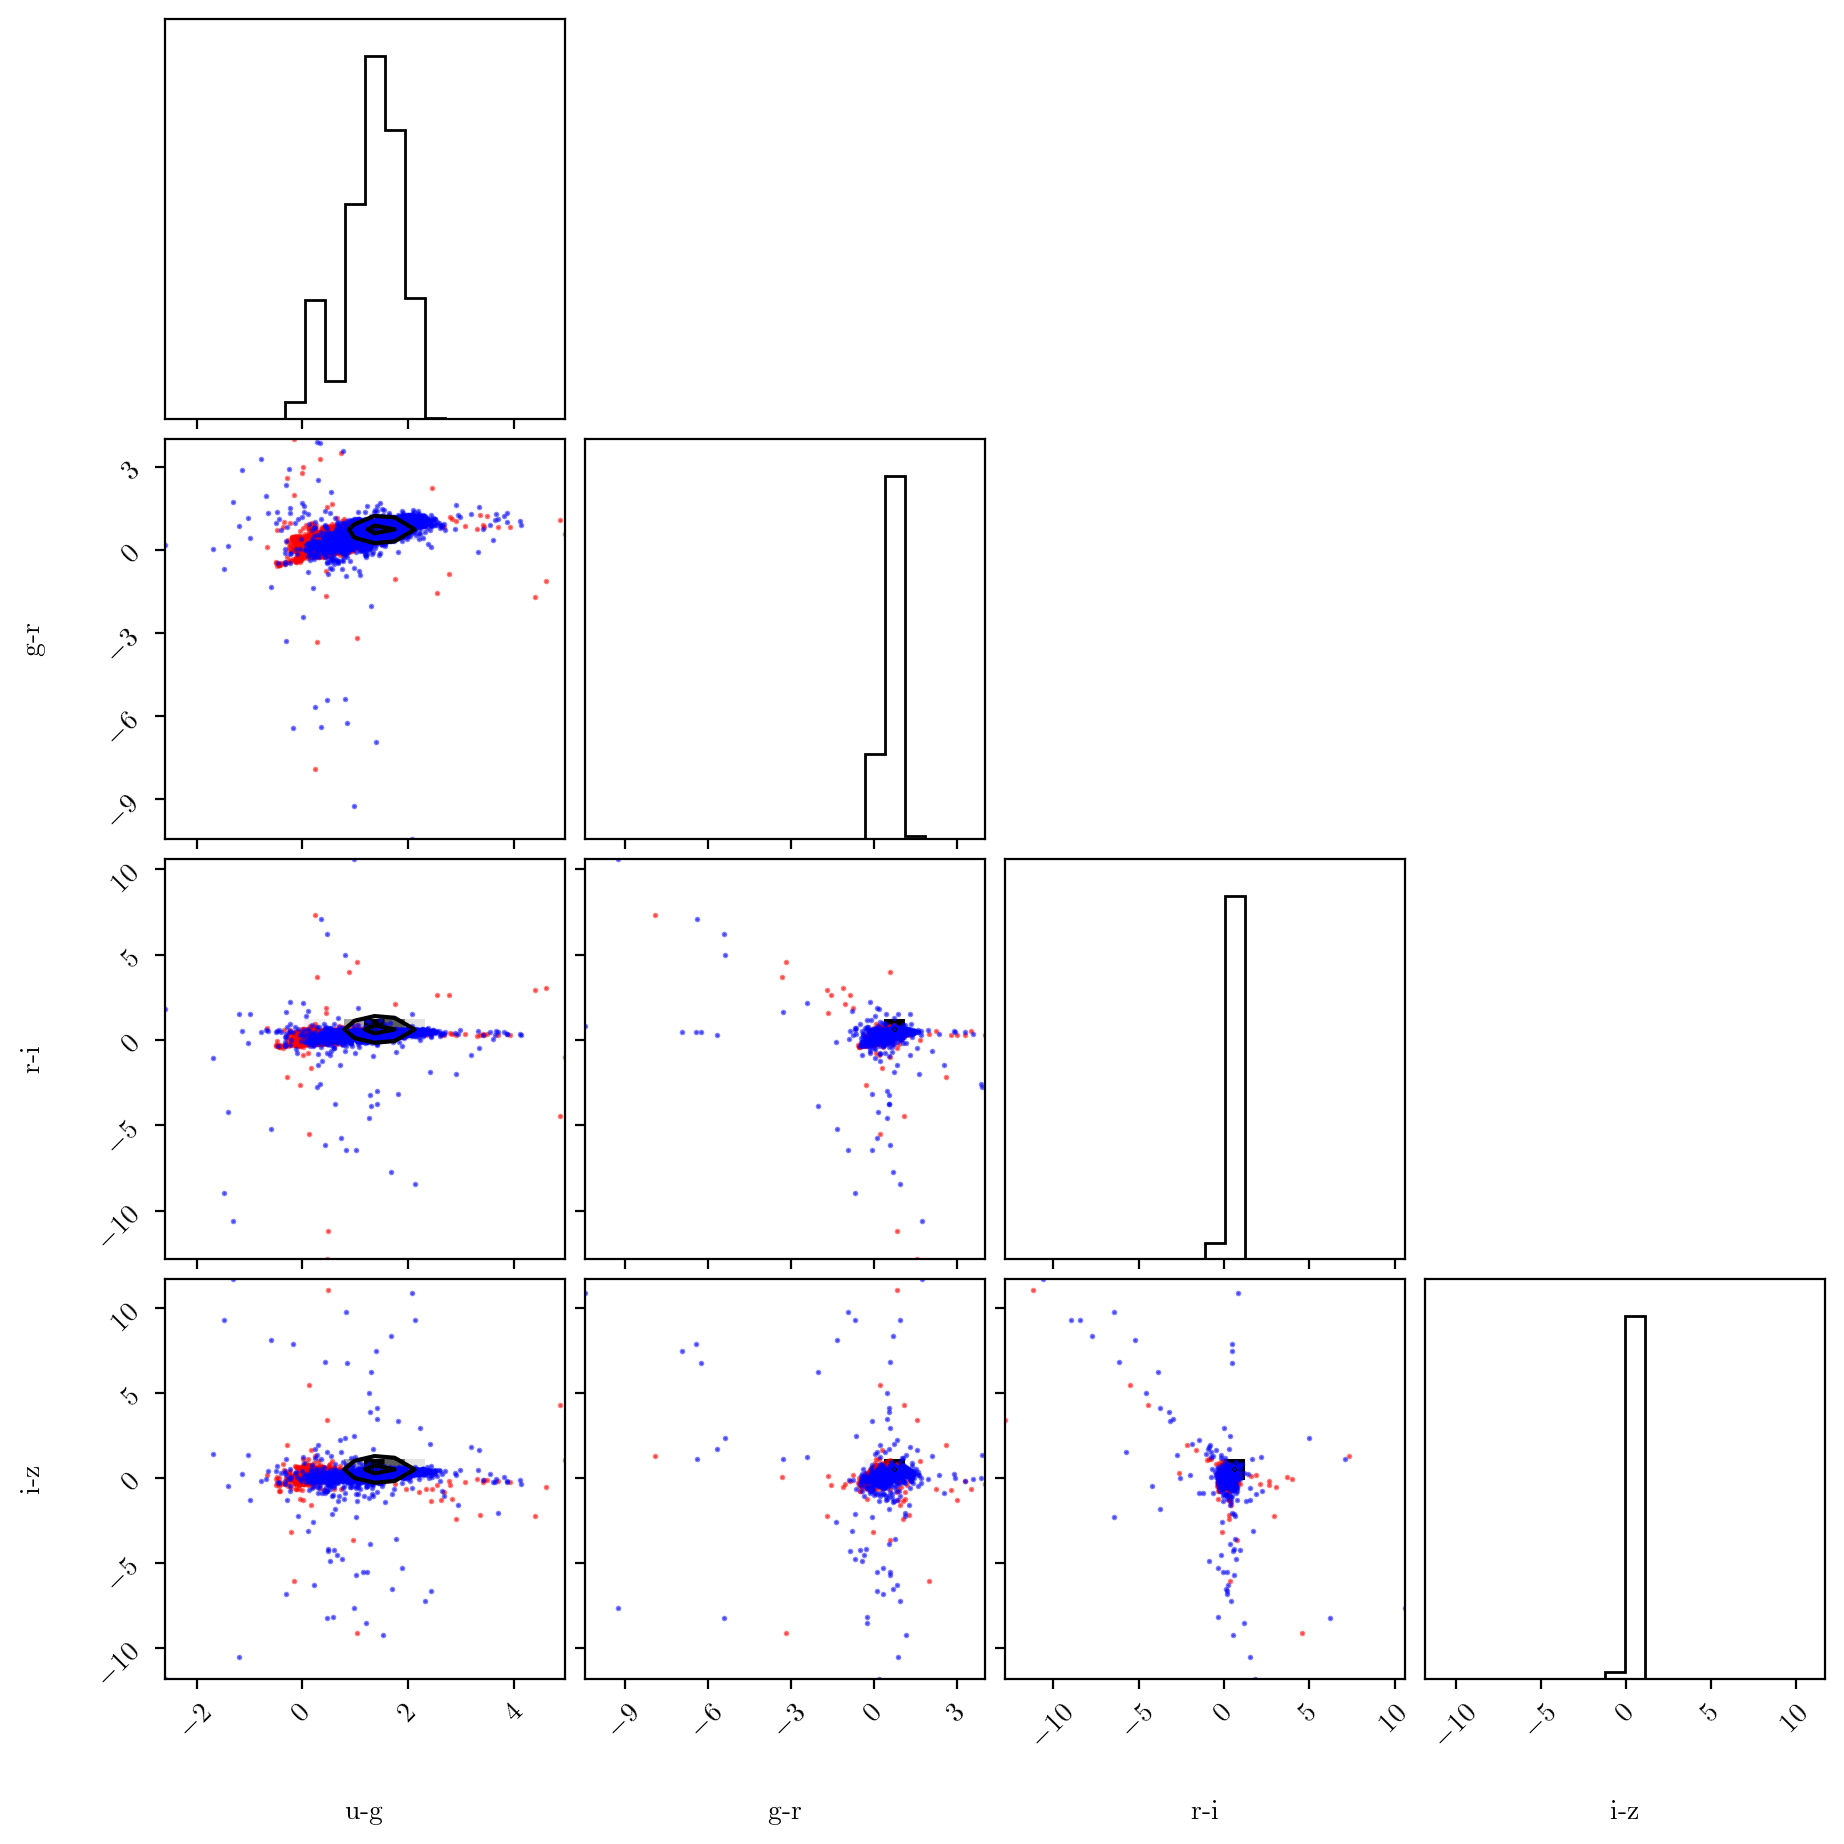

In [19]:
figure = corner.corner(X, labels=["u-g", "g-r", "r-i", "i-z"], plot_datapoints=False)

axes = np.array(figure.axes).reshape((4, 4))

for i in range(4):
    for j in range(i):
        ax = axes[i, j]
        ax.scatter(X[labels == 1, j], X[labels == 1, i], color="red", s=1, label="QSO", alpha=0.5)
        ax.scatter(X[labels == 0, j], X[labels == 0, i], color="blue", s=1, label="Galaxy", alpha=0.5)

plt.show()

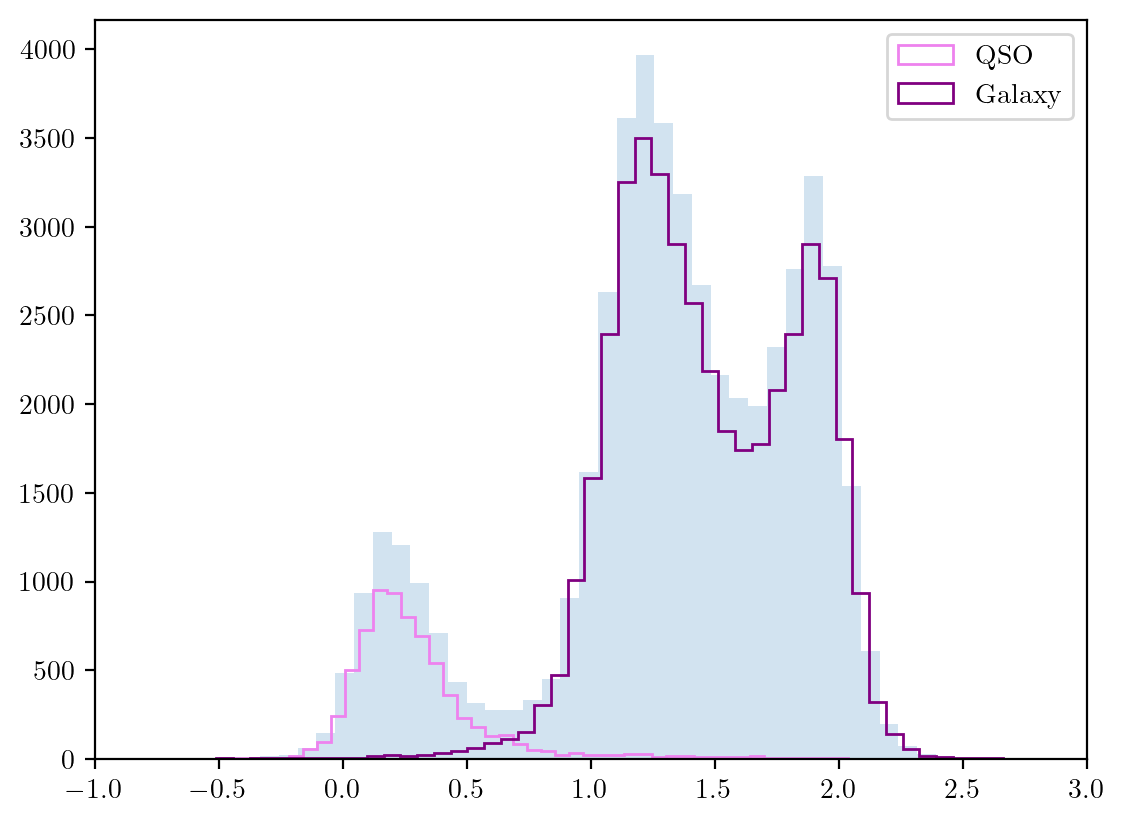

In [7]:
plt.hist(ug, bins=100, alpha=0.2)
plt.hist(ug[labels==1], histtype='step', bins=100, label='QSO', color='violet')
plt.hist(ug[labels==0], histtype='step', bins=100, label='Galaxy', color='purple')
plt.xlim(-1,3)
plt.legend()
plt.show()

### Gaussian Naive Bayes

Gaussian Naive Bayes 
Completeness = [0.92750929 0.92286245 0.91682156 0.91635688] 
Contamination = [0.06203008 0.10257569 0.10562103 0.11251125]


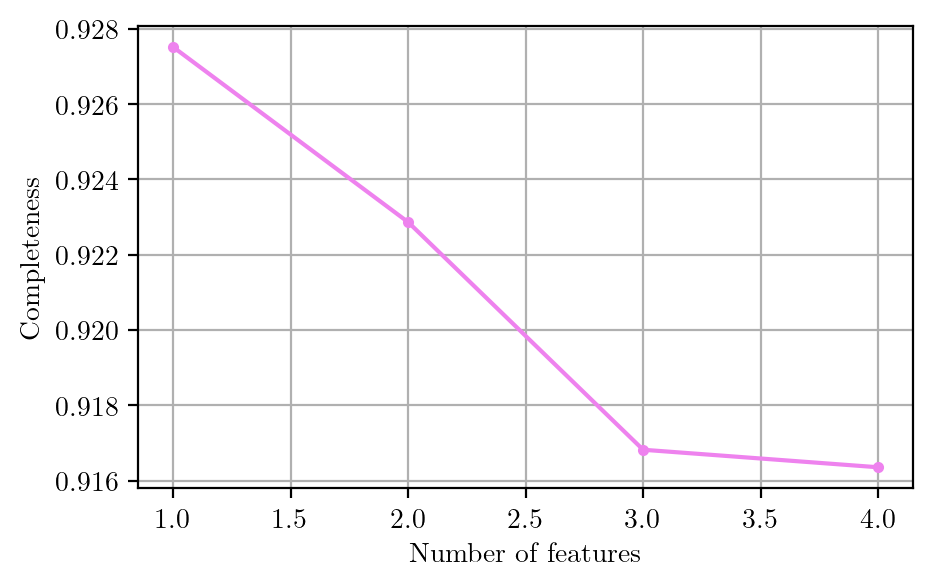

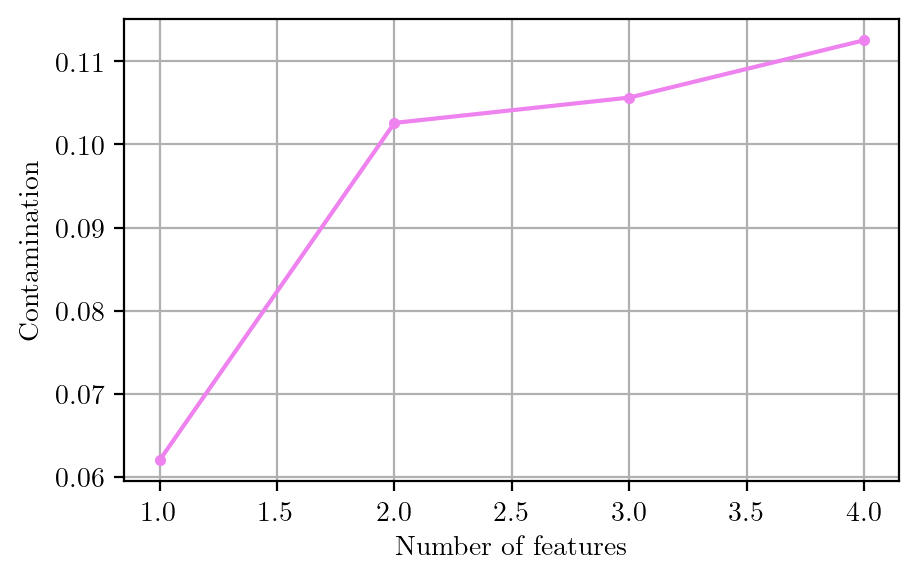

In [9]:
feat = np.linspace(1,4,4)
lab_prob = []
lab_pred = []

for x in feat:
    
    gnb = GaussianNB()
    gnb.fit(X_train[:,:int(x)],lab_train)
    
    pred_labels = gnb.predict(X_test[:, :int(x)])
    pred_probs = gnb.predict_proba(X_test[:, :int(x)])[:, 1]
    
    lab_pred.append(pred_labels)
    lab_prob.append(pred_probs)

completeness, contamination = completeness_contamination(lab_pred, lab_test)
print(f'Gaussian Naive Bayes \nCompleteness = {completeness} \nContamination = {contamination}')

plt.figure(figsize=(5,3))
plt.plot(feat, completeness, marker='.', color='violet')
plt.xlabel('Number of features')
plt.ylabel('Completeness')
plt.grid()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(feat, contamination, marker='.', color='violet')
plt.xlabel('Number of features')
plt.ylabel('Contamination')
plt.grid()
plt.show()
#bohh non ha senso secondo meeeee

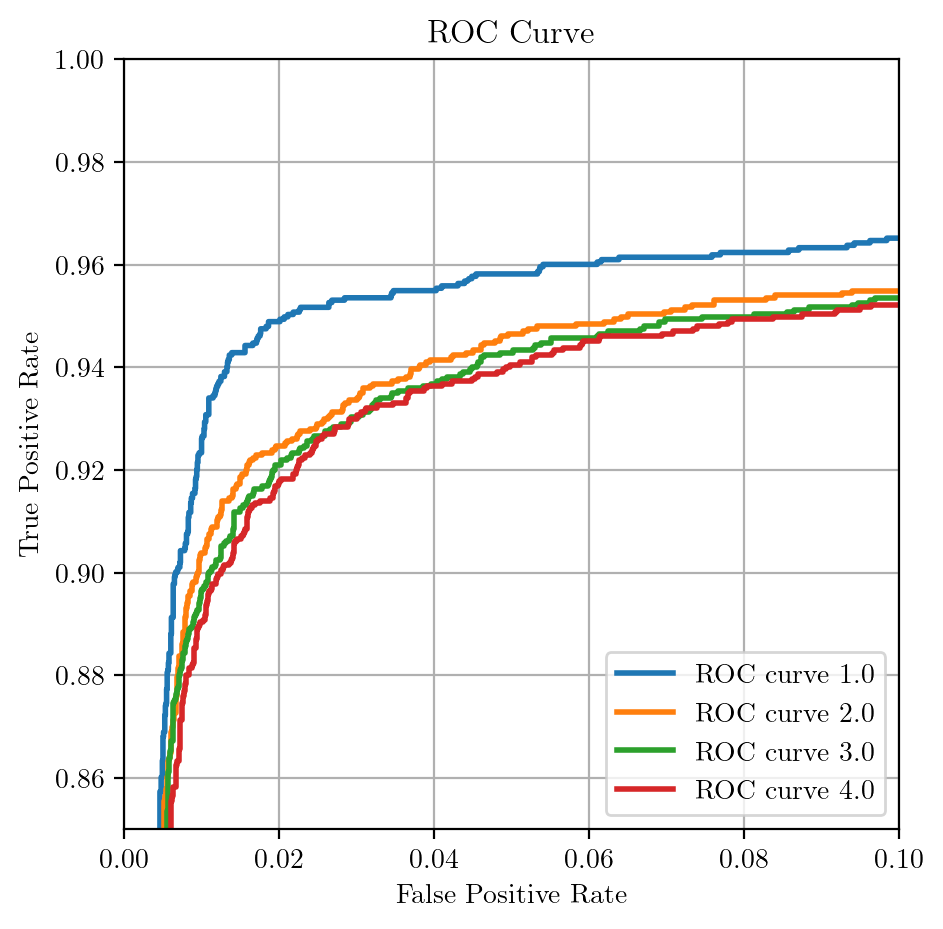

In [10]:
plt.figure(figsize=(5, 5))

for i in feat:
    fpr, tpr, _ = roc_curve(lab_test, lab_prob[int(i-1)])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve {i}')

#plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 0.1])
plt.ylim([0.85, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Linear and Quadr Discriminant Analysis

Linear DA 
Completeness = [0.92797398 0.92472119 0.92565056 0.92750929], Contamination = [0.06244131 0.05999055 0.0577105  0.05626478]
Quadratic DA 
Completeness = [0.92750929 0.93076208 0.92750929 0.92936803], Contamination = [0.06203008 0.06094702 0.06026365 0.06015038]


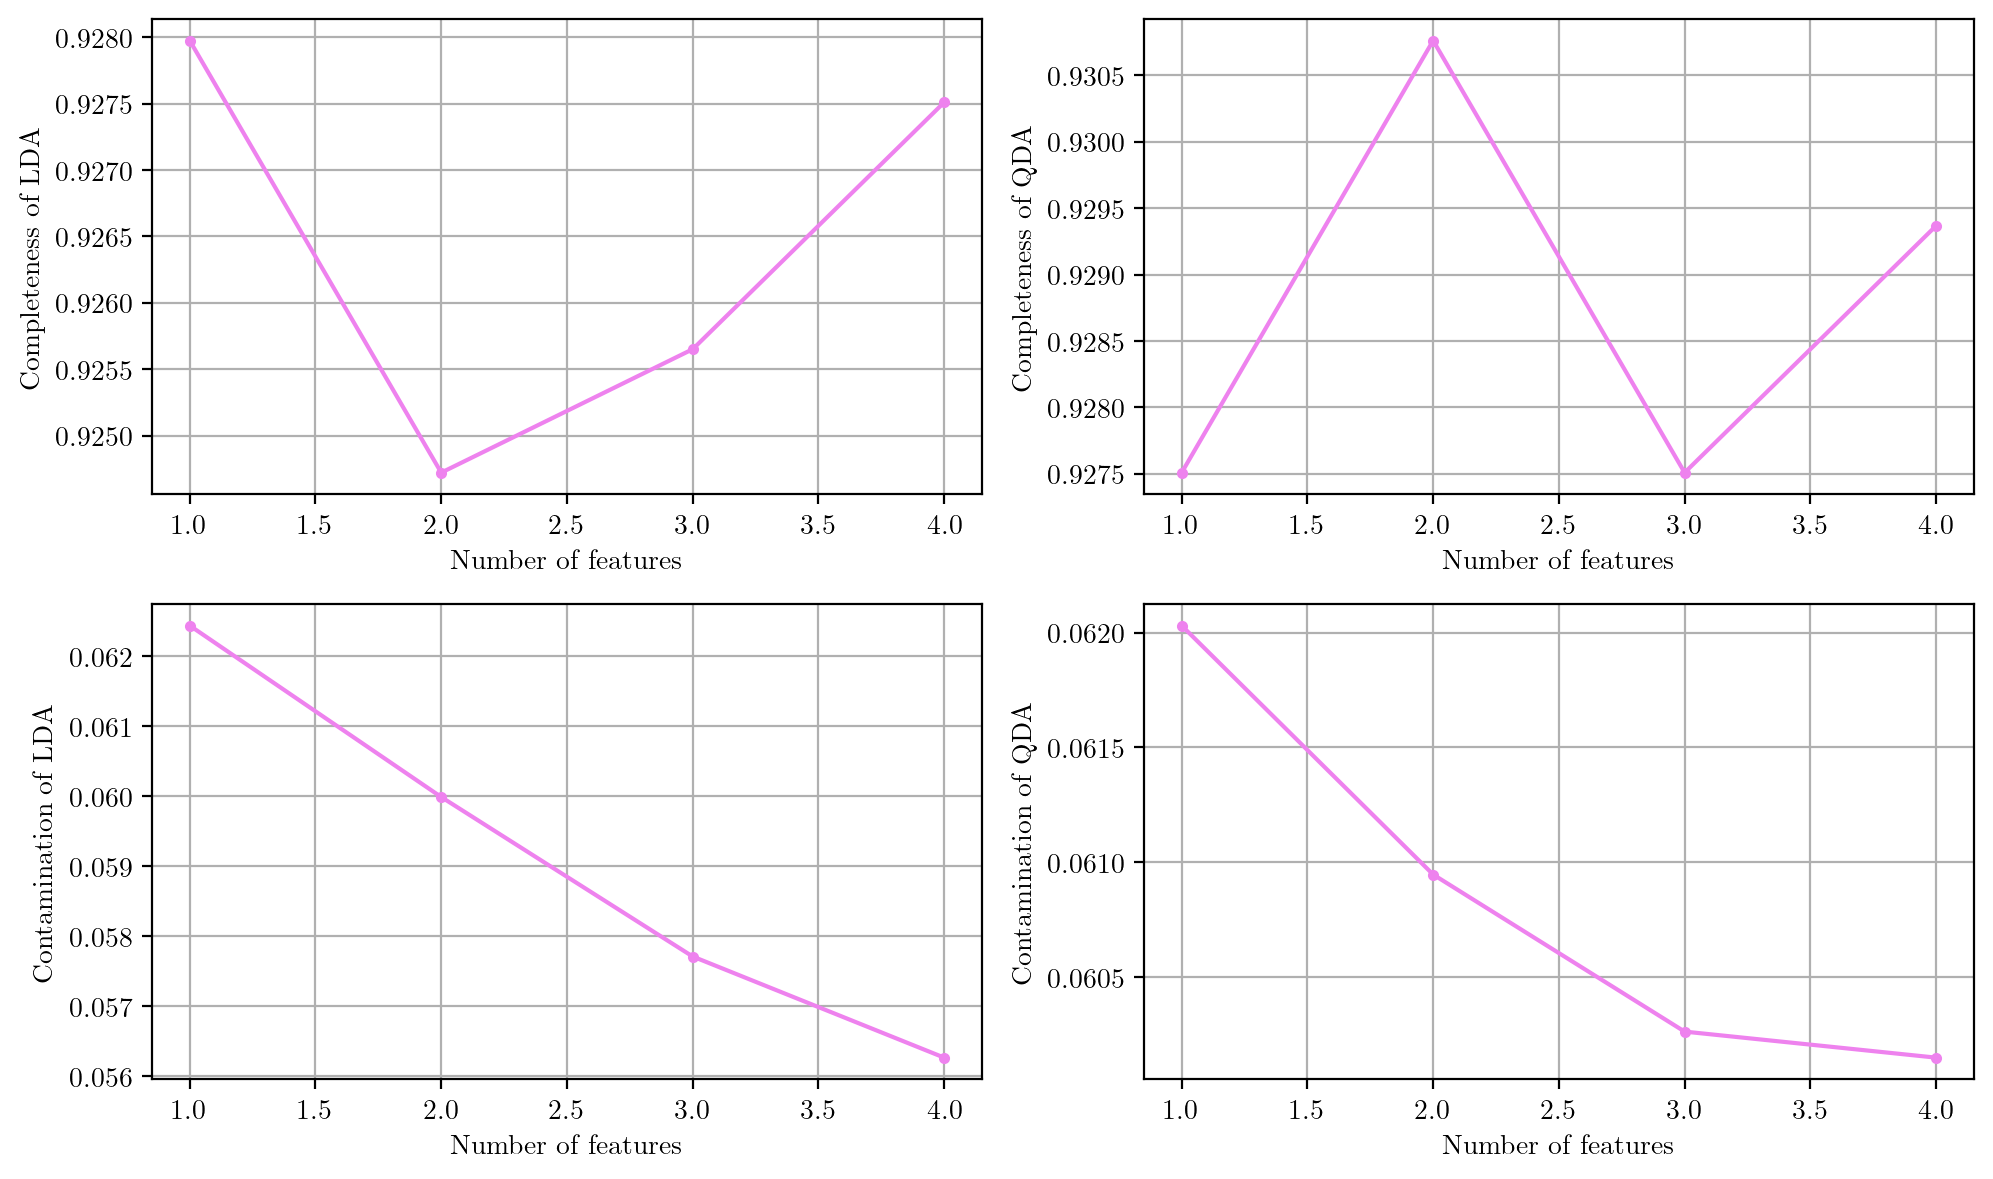

In [11]:
feat = np.linspace(1,4,4)
lab_prob_l = []
lab_pred_l = []
lab_prob_q = []
lab_pred_q = []

for x in feat:
    
    lda = LDA()
    lda.fit(X_train[:,:int(x)],lab_train)
    
    lab_pred_l.append(lda.predict(X_test[:, :int(x)]))
    lab_prob_l.append(lda.predict_proba(X_test[:, :int(x)])[:, 1])

    qda = QDA()
    qda.fit(X_train[:,:int(x)],lab_train)
    
    lab_pred_q.append(qda.predict(X_test[:, :int(x)]))
    lab_prob_q.append(qda.predict_proba(X_test[:, :int(x)])[:, 1])
    

completeness_l, contamination_l = completeness_contamination(lab_pred_l, lab_test)
print(f'Linear DA \nCompleteness = {completeness_l}, Contamination = {contamination_l}')


completeness_q, contamination_q = completeness_contamination(lab_pred_q, lab_test)
print(f'Quadratic DA \nCompleteness = {completeness_q}, Contamination = {contamination_q}')

plt.figure(figsize=(10, 6))


plt.subplot(2, 2, 1)
plt.plot(feat, completeness_l, marker='.', color='violet')
plt.xlabel('Number of features')
plt.ylabel('Completeness of LDA')
plt.grid()


plt.subplot(2, 2, 2)
plt.plot(feat, completeness_q, marker='.', color='violet')
plt.xlabel('Number of features')
plt.ylabel('Completeness of QDA')
plt.grid()


plt.subplot(2, 2, 3)
plt.plot(feat, contamination_l, marker='.', color='violet')
plt.xlabel('Number of features')
plt.ylabel('Contamination of LDA')
plt.grid()


plt.subplot(2, 2, 4)
plt.plot(feat, contamination_q, marker='.', color='violet')
plt.xlabel('Number of features')
plt.ylabel('Contamination of QDA')
plt.grid()

plt.tight_layout()
plt.show()

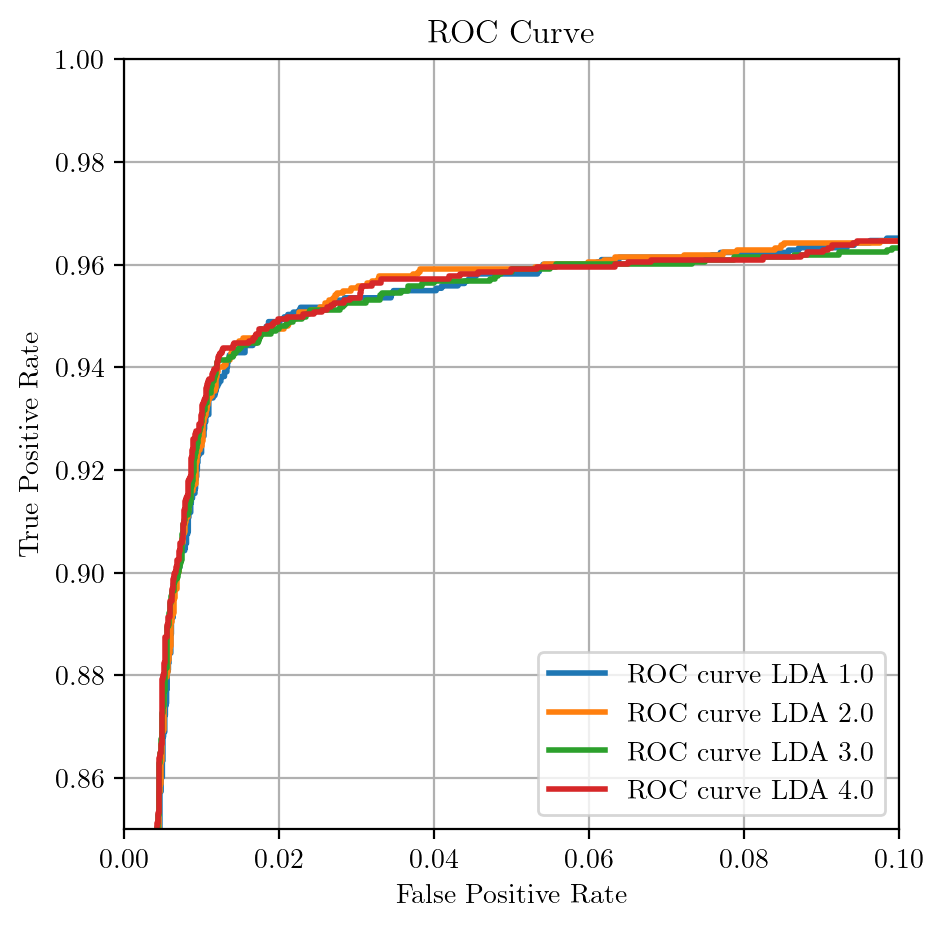

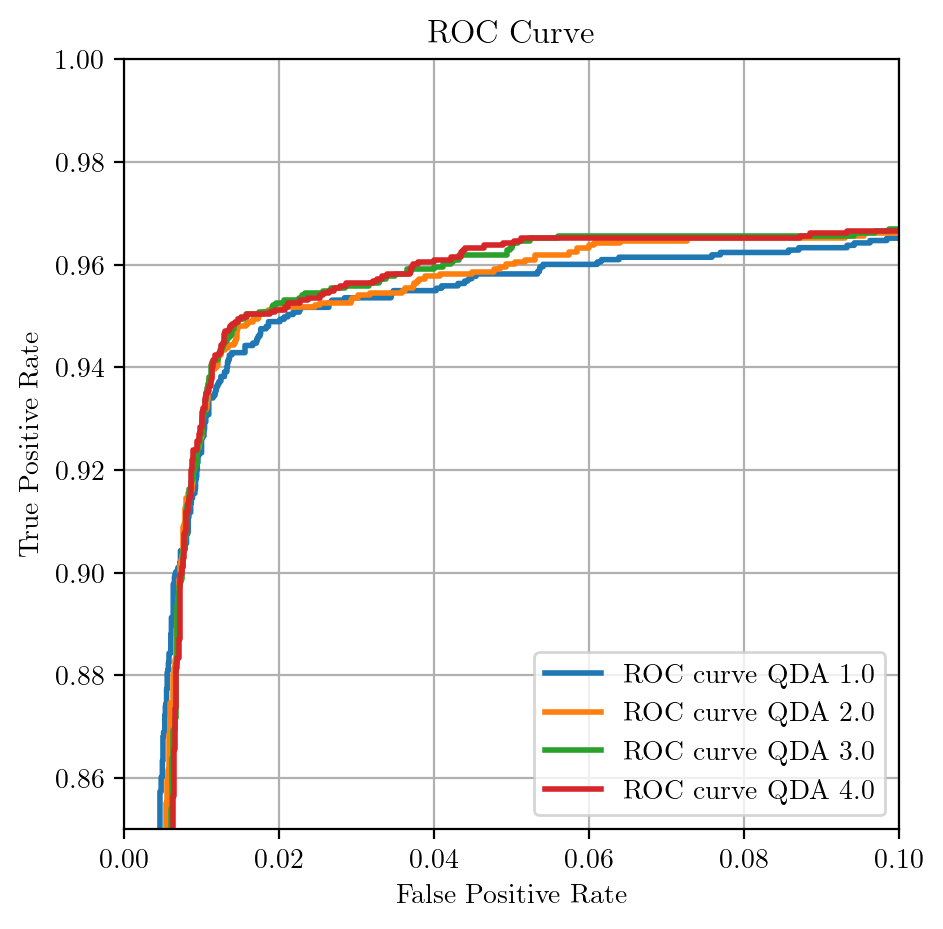

In [12]:
plt.figure(figsize=(5, 5))

for i in feat:
    fpr, tpr, _ = roc_curve(lab_test, lab_prob_l[int(i)-1])
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve LDA {i}')

plt.xlim([0.0, 0.1])
plt.ylim([0.85, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.figure(figsize=(5, 5))

for i in feat:
    fpr, tpr, _ = roc_curve(lab_test, lab_prob_q[int(i)-1])
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve QDA {i}')

plt.xlim([0.0, 0.1])
plt.ylim([0.85, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### GMM

GMM 
Completeness = [0.92750929 0.93076208 0.92750929 0.92936803 0.93215613 0.92379182
 0.93494424 0.93169145] 
Contamination = [0.06203008 0.06094702 0.06026365 0.06015038 0.06870938 0.04789272
 0.04327152 0.05021317]


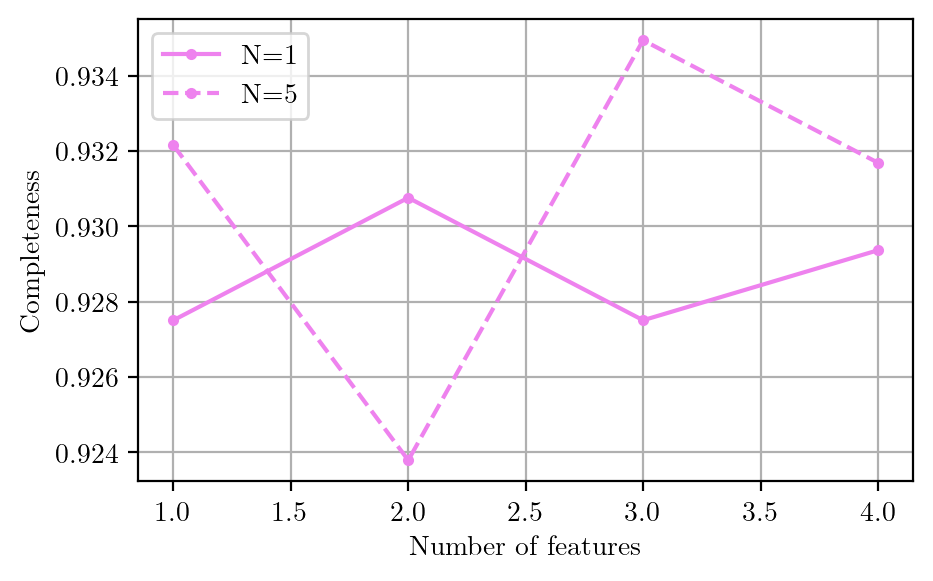

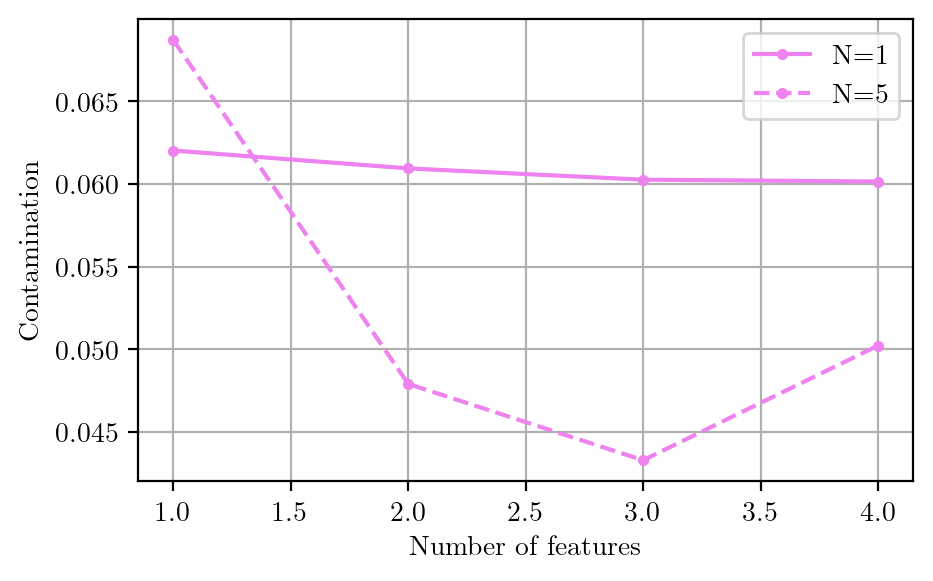

In [13]:
lab_pred = []
lab_prob = []
feat = np.linspace(1,4,4)
clusters = [1,5]

for c in clusters:
    
    for x in feat:
        
        gmm = GMMBayes(c, covariance_type='full')
        gmm.fit(X_train[:, :int(x)], lab_train)
        
        pred_labels = gmm.predict(X_test[:, :int(x)])
        pred_probs = gmm.predict_proba(X_test[:, :int(x)])[:, 1]
        
        lab_pred.append(pred_labels)
        lab_prob.append(pred_probs)

completeness, contamination = completeness_contamination(lab_pred, lab_test)
print(f'GMM \nCompleteness = {completeness} \nContamination = {contamination}')

plt.figure(figsize=(5,3))
plt.plot(feat, completeness[:4], marker='.', color='violet', label='N=1')
plt.plot(feat, completeness[4:], marker='.', linestyle='--', color='violet', label='N=5')
plt.xlabel('Number of features')
plt.ylabel('Completeness')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(feat, contamination[:4], marker='.', color='violet', label='N=1')
plt.plot(feat, contamination[4:], marker='.', linestyle='--', color='violet', label='N=5')
plt.xlabel('Number of features')
plt.ylabel('Contamination')
plt.grid()
plt.legend()
plt.show()

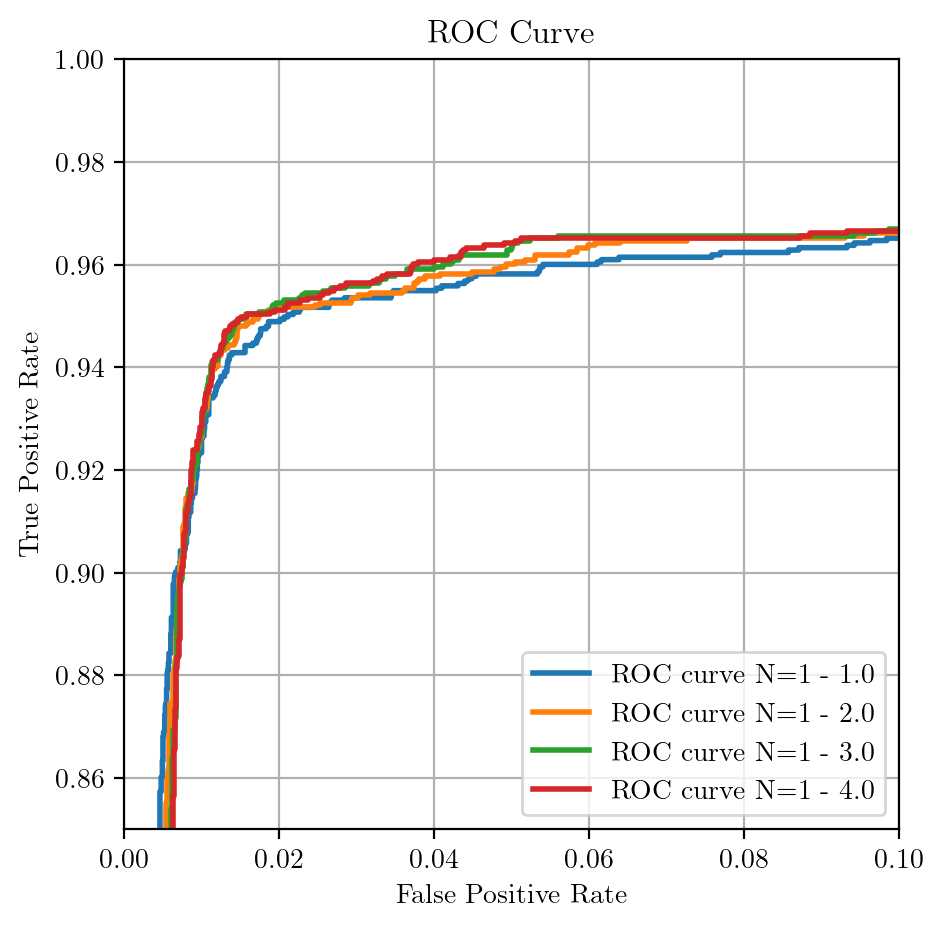

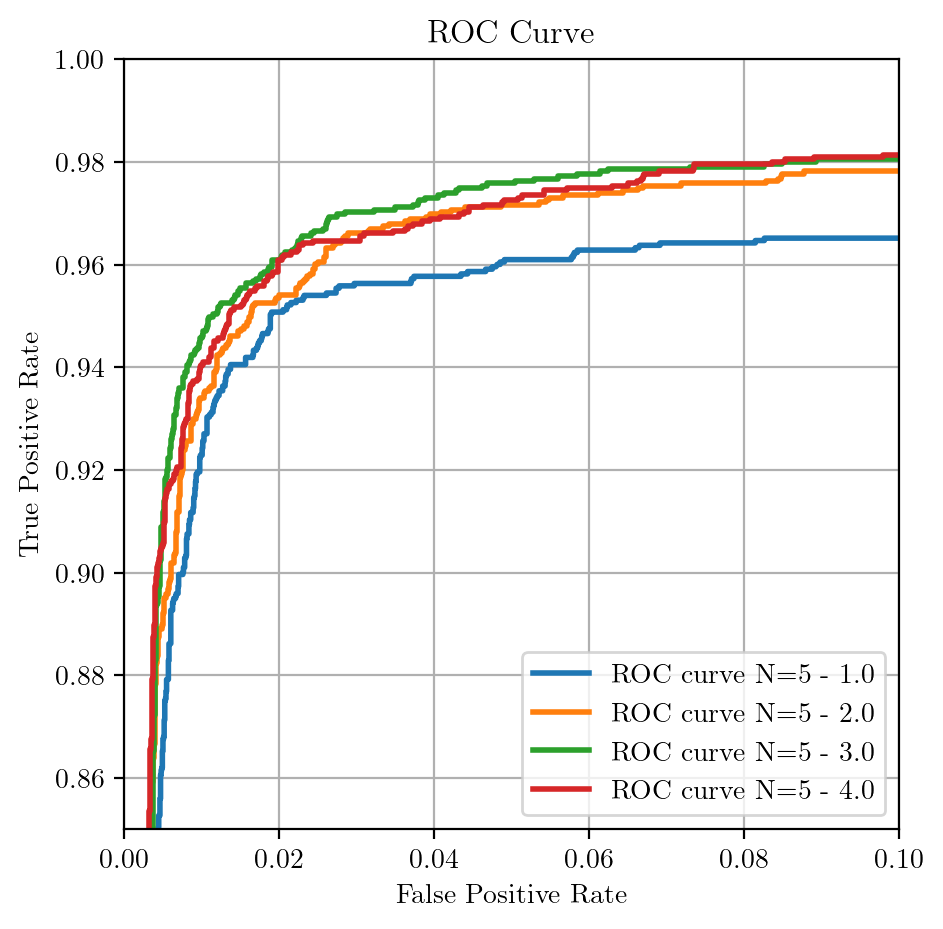

In [14]:
plt.figure(figsize=(5, 5))

for i in feat:
    fpr_1, tpr_1, _ = roc_curve(lab_test, lab_prob[int(i)-1])  
    plt.plot(fpr_1, tpr_1, lw=2, label=f'ROC curve N=1 - {i}')

plt.xlim([0.0, 0.1])
plt.ylim([0.85, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.figure(figsize=(5, 5))

for i in feat:
    fpr_5, tpr_5, _ = roc_curve(lab_test, lab_prob[int(i)+3])
    plt.plot(fpr_5, tpr_5, lw=2, label=f'ROC curve N=5 - {i}')

plt.xlim([0.0, 0.1])
plt.ylim([0.85, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## K nearest neigh

KNN 
Completeness = [0.83596654 0.85827138 0.89591078 0.90288104 0.91310409 0.91542751
 0.92936803 0.93587361] 
Contamination = [0.04965663 0.03802083 0.03406814 0.03285217 0.05255545 0.0464666
 0.03614458 0.03219606]


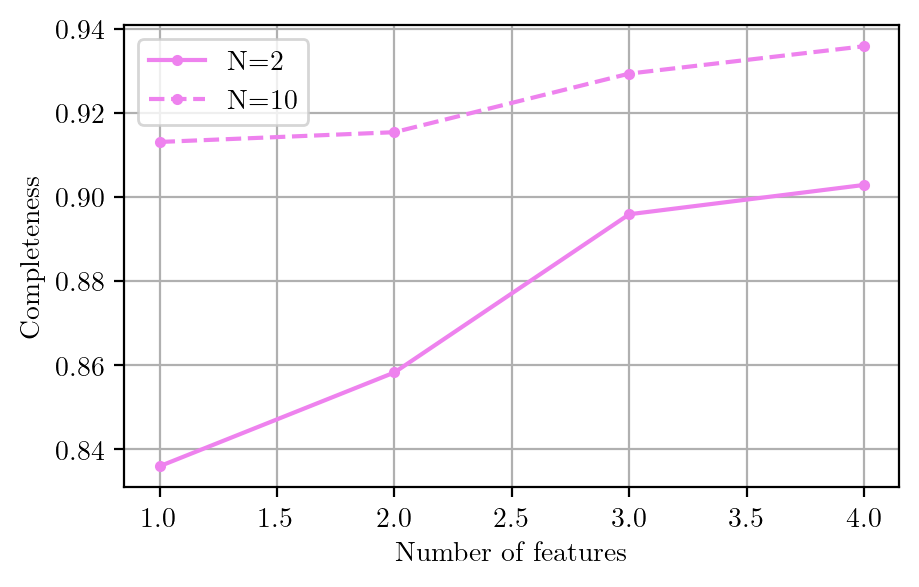

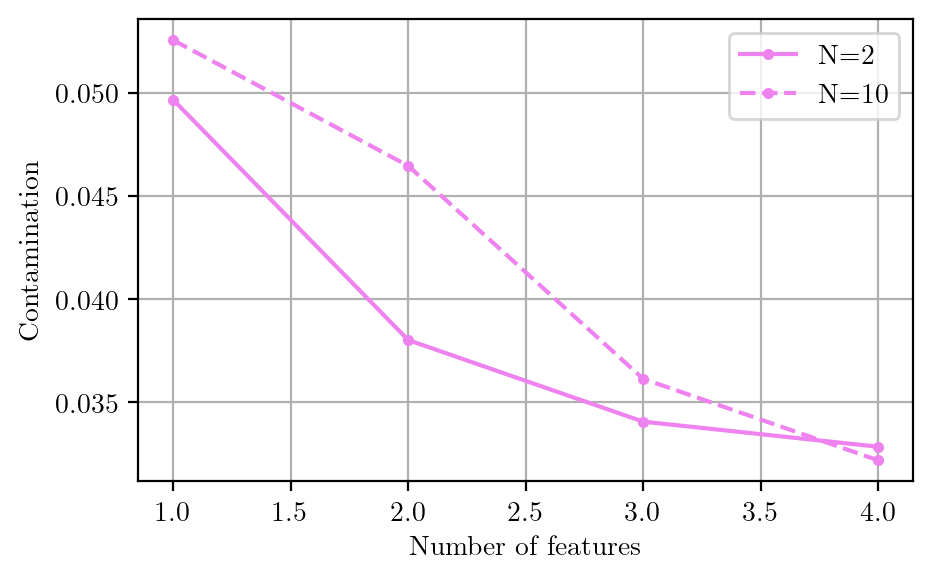

In [15]:
lab_pred = []
lab_prob = []
feat = np.linspace(1,4,4)
clusters = [2,10]

for c in clusters:
    
    for x in feat:
        knn = KNeighborsClassifier(c)
        knn.fit(X_train[:, :int(x)],lab_train)
       
        pred_labels = knn.predict(X_test[:, :int(x)])
        pred_probs = knn.predict_proba(X_test[:, :int(x)])[:, 1]
        
        lab_pred.append(pred_labels)
        lab_prob.append(pred_probs)

completeness, contamination = completeness_contamination(lab_pred, lab_test)
print(f'KNN \nCompleteness = {completeness} \nContamination = {contamination}')

plt.figure(figsize=(5,3))
plt.plot(feat, completeness[:4], marker='.', color='violet', label='N=2')
plt.plot(feat, completeness[4:], marker='.', linestyle='--', color='violet', label='N=10')
plt.xlabel('Number of features')
plt.ylabel('Completeness')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(feat, contamination[:4], marker='.', color='violet', label='N=2')
plt.plot(feat, contamination[4:], marker='.', linestyle='--', color='violet', label='N=10')
plt.xlabel('Number of features')
plt.ylabel('Contamination')
plt.grid()
plt.legend()
plt.show()

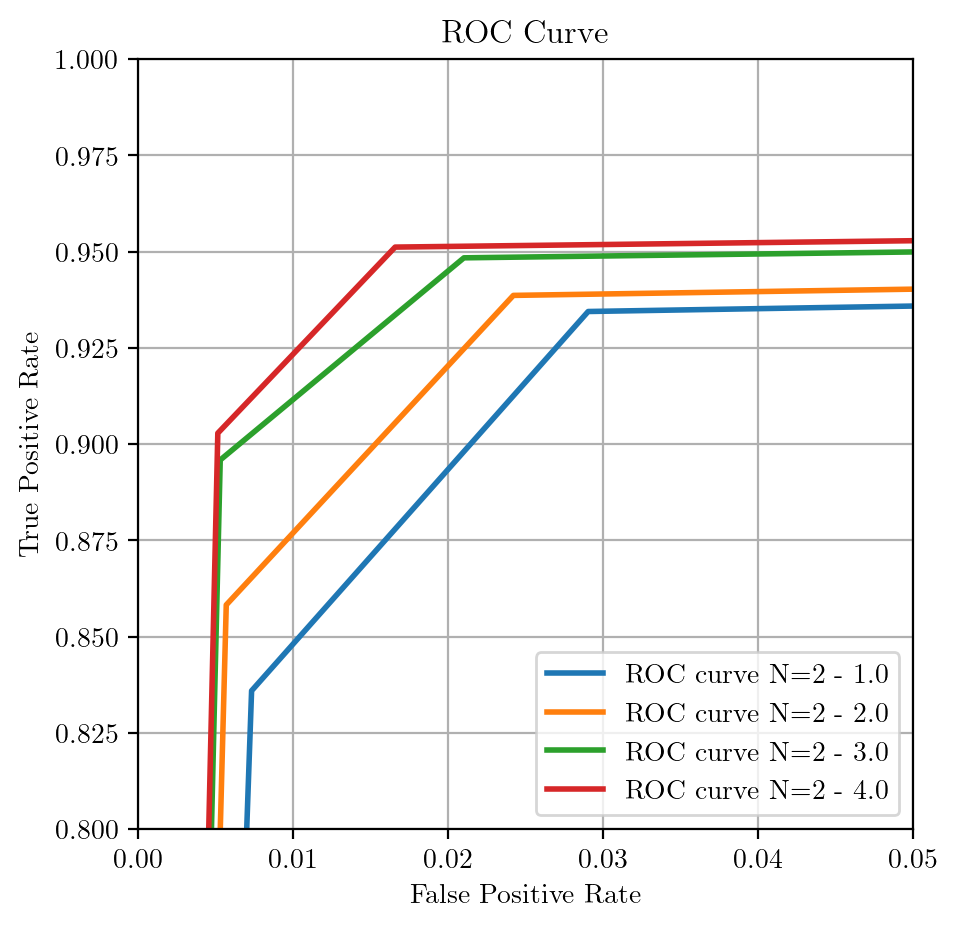

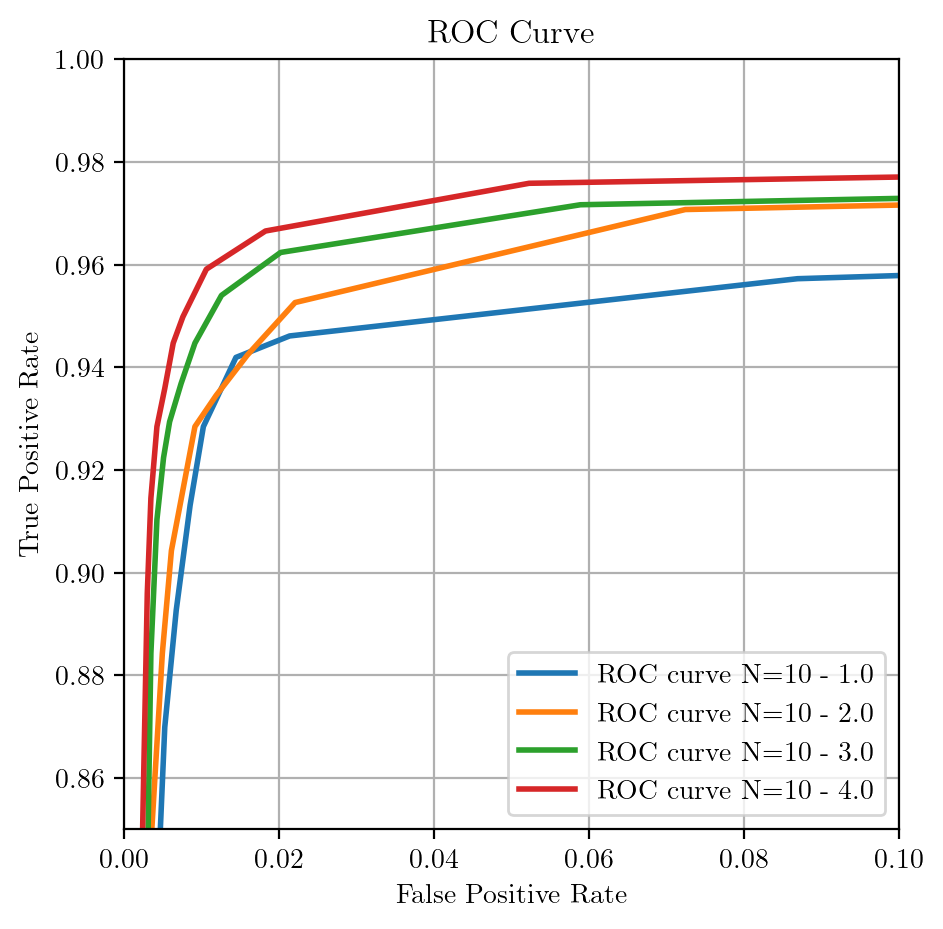

In [16]:
plt.figure(figsize=(5, 5))

for i in feat:
    fpr_2, tpr_2, _ = roc_curve(lab_test, lab_prob[int(i)-1])  
    plt.plot(fpr_2, tpr_2, lw=2, label=f'ROC curve N=2 - {i}')

plt.xlim([0.0, 0.05])
plt.ylim([0.8, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.figure(figsize=(5, 5))

for i in feat:
    fpr_10, tpr_10, _ = roc_curve(lab_test, lab_prob[int(i)+3])
    plt.plot(fpr_10, tpr_10, lw=2, label=f'ROC curve N=10 - {i}')

plt.xlim([0.0, 0.1])
plt.ylim([0.85, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()